In [2]:
import mne
import warnings
import matplotlib.pyplot as plt
import os
import numpy as np
from tqdm import tqdm
warnings.filterwarnings('ignore')
# %matplotlib notebook

In [4]:
print(1)

1


In [3]:
data = mne.io.read_raw('data/kz_clean/health/clean_F116.fif')

Opening raw data file data/kz_clean/health/clean_F116.fif...


FileNotFoundError: fname does not exist: data/kz_clean/health/clean_F116.fif

In [52]:
data

<Raw | clean_F116.fif, 21 x 63000 (126.0 s), ~36 kB, data not loaded>

<IPython.core.display.Javascript object>


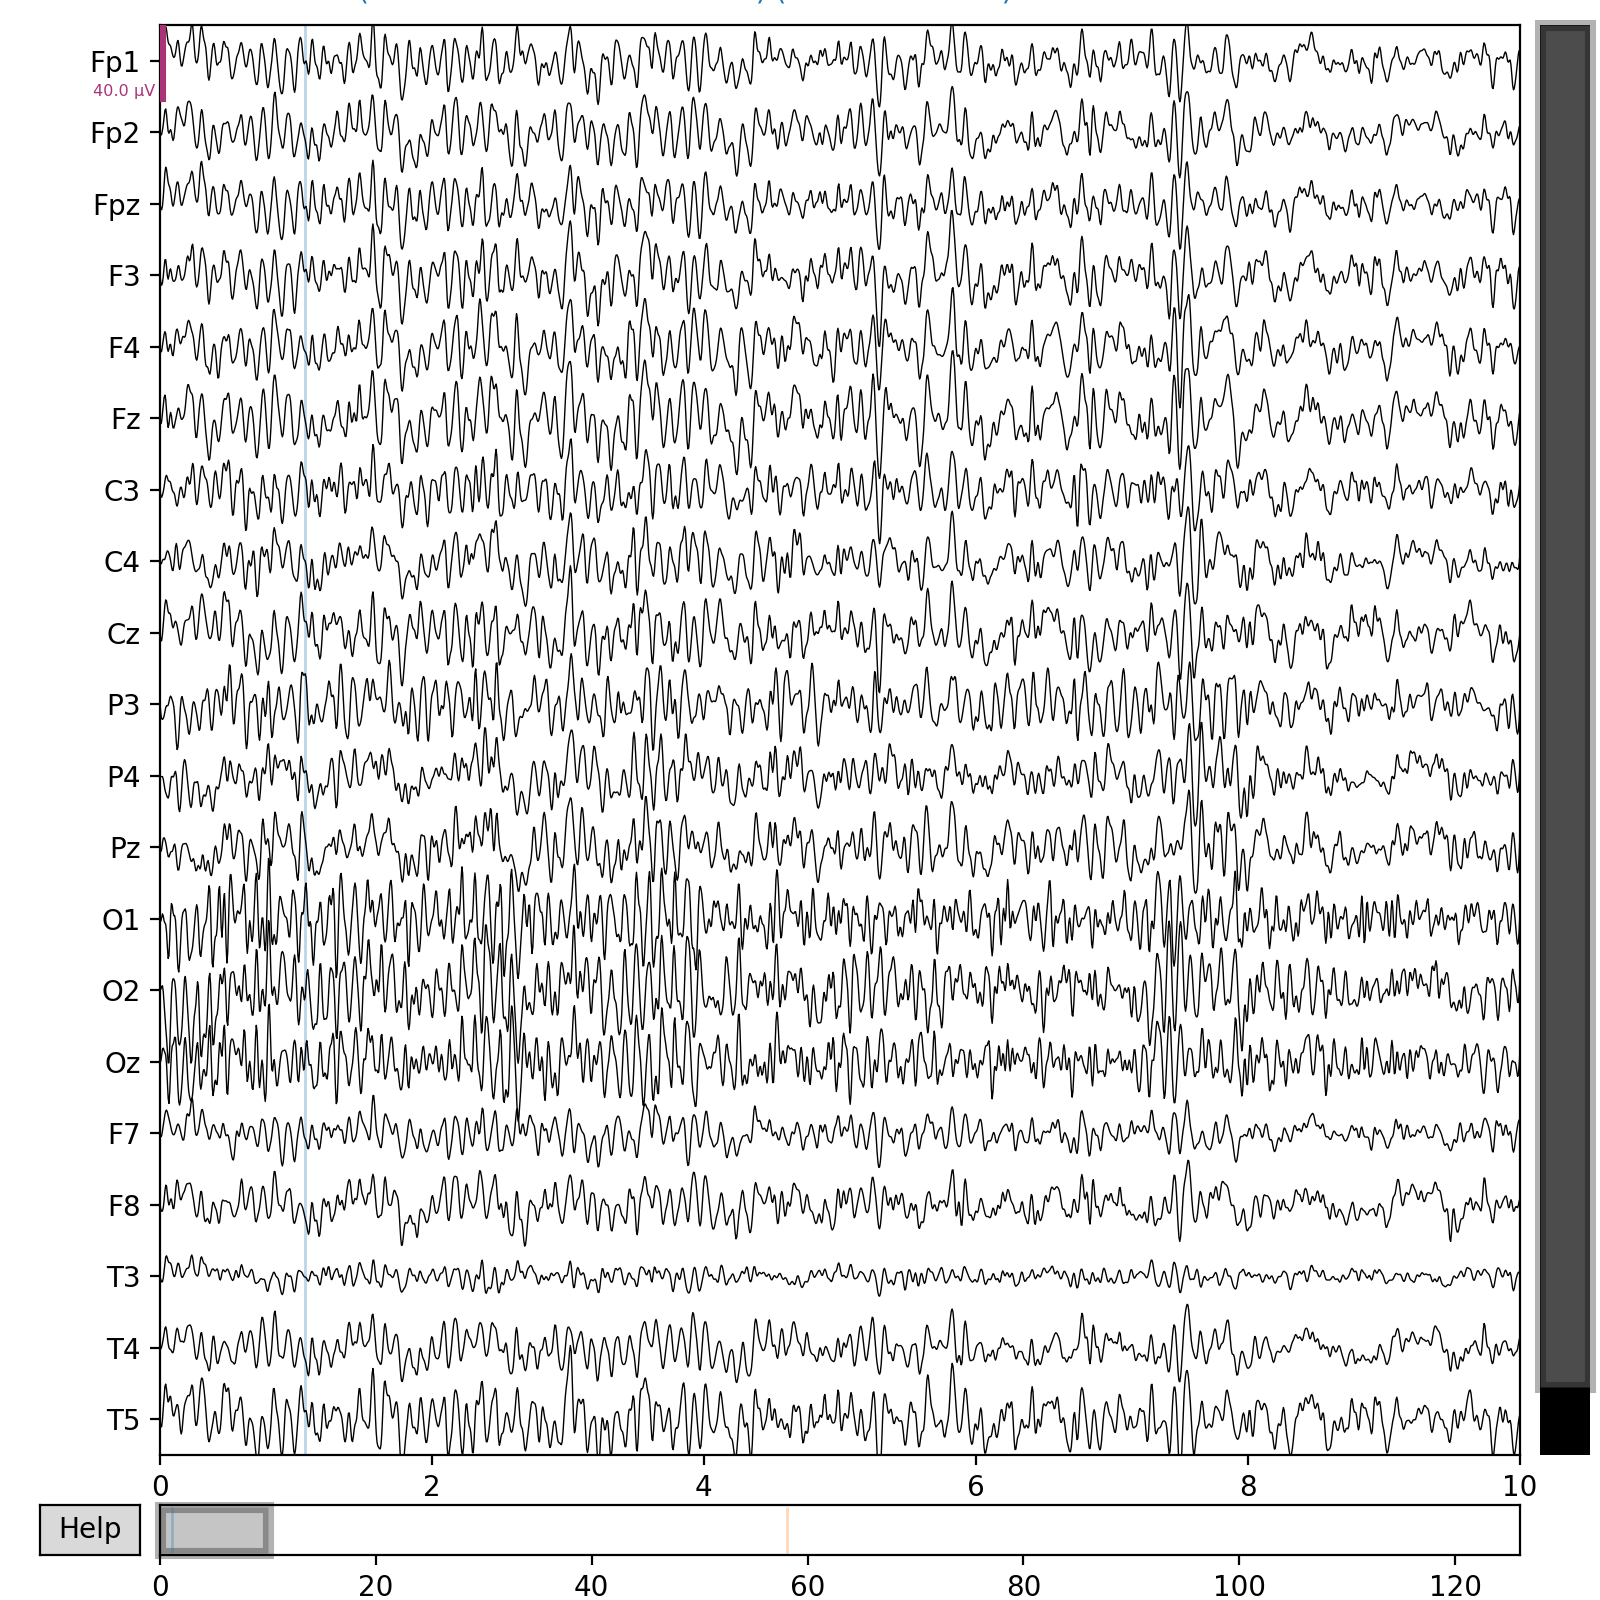

In [54]:
data.plot();

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.512 (s)


<IPython.core.display.Javascript object>


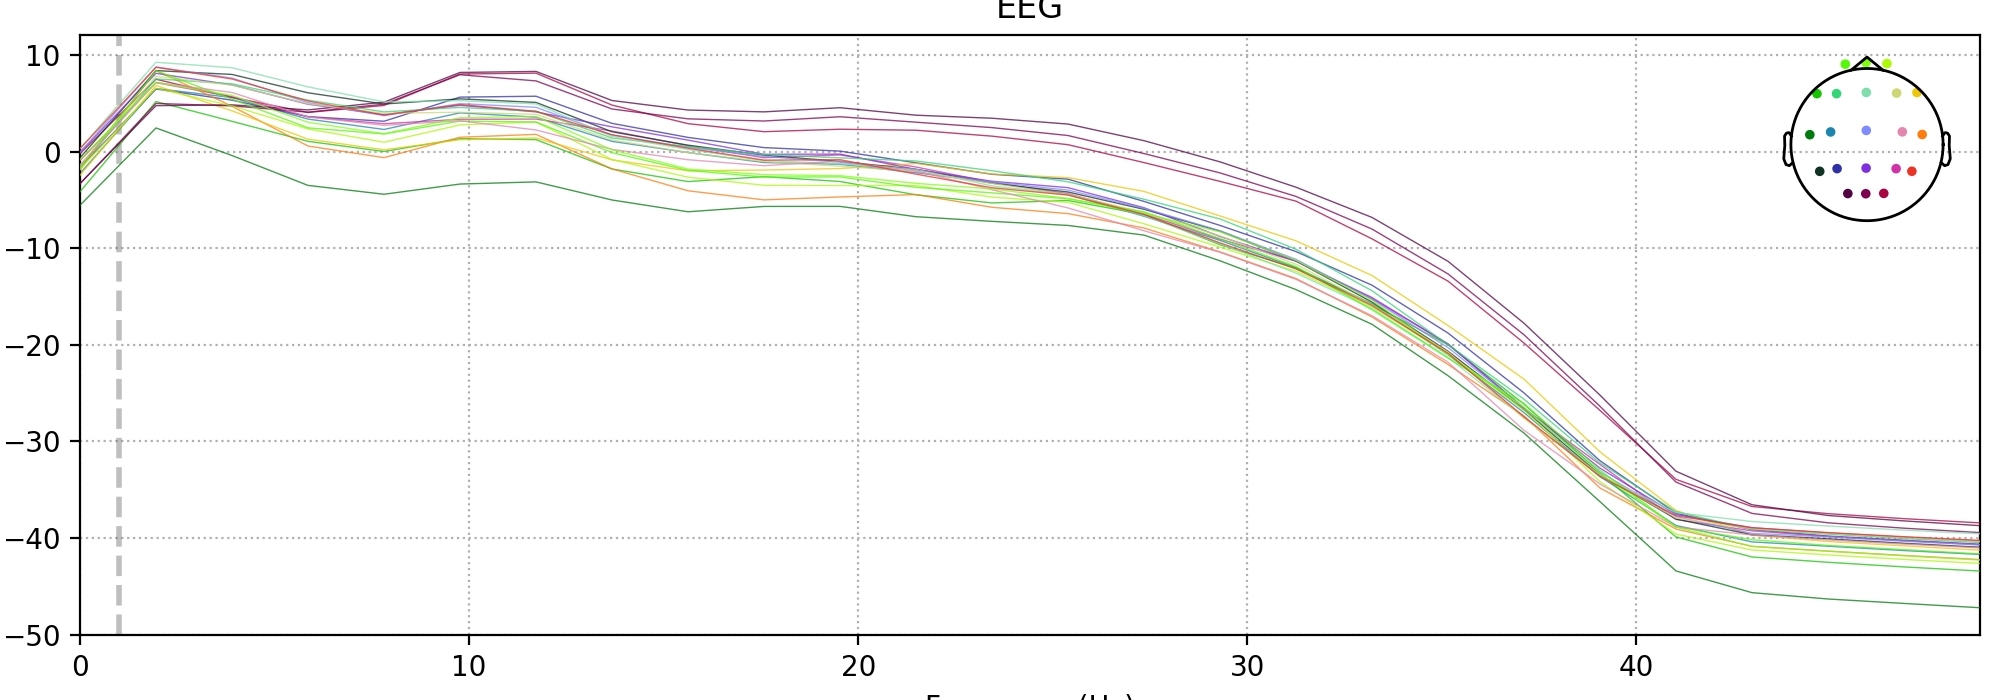

In [55]:
data.plot_psd(fmax = 50);

In [56]:
def find_common_electrodes(path):
    mdd_electrodes_set = []
    for elem in os.listdir(path):
        data = mne.io.read_raw(path + elem, verbose = False)
        mdd_electrodes_set.append(set(data.ch_names))
    return set.intersection(*mdd_electrodes_set)

In [ ]:
kz_mdd = find_common_electrodes('data/kz_clean/mdd/')
kz_health = find_common_electrodes('data/kz_clean/health/')
electrodes_to_use = set.intersection(kz_mdd, kz_health)
print(electrodes_to_use)

# Data cutting

In [47]:
Fs = 500
electrodes_to_use = set.intersection(kz_mdd, kz_health)
window_size = 2 # in seconds

In [48]:
def cut_data(path, path_to_save, window_size = window_size, 
             window_offset = window_size, 
             Fs = Fs, electrodes_to_use = electrodes_to_use):
    for elem in tqdm(os.listdir(path)):
        data = mne.io.read_raw(path + elem, verbose = False)
        
        for ch in data.ch_names:
            if ch not in electrodes_to_use:
                data.drop_channels(ch)
        np_data = data[:][0].T
        
        idx = 1
        offset = 0
        num_of_samples = Fs * window_size
        while np_data[offset : offset + num_of_samples].shape[0] == num_of_samples:
            name = elem.split('.')[0]
            np.save(path_to_save + f'{name}_patch_{idx}.npy', 
                    np_data[offset : offset + num_of_samples])
            offset += window_offset * Fs
            idx += 1

In [34]:
cut_data('data/kz_clean/health/', 'data_np/kz_clean/health/')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 13.77it/s]


In [35]:
cut_data('data/kz_clean/mdd/', 'data_np/kz_clean/mdd/')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.17it/s]


In [49]:
print(1)

1
